<a href="https://colab.research.google.com/github/KushalShah1/ImageProcessingFinal/blob/main/EasyOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install easyocr
!pip install imutils

     |████████████████████████████████| 63.6 MB 1.3 MB/s 
     |████████████████████████████████| 47.6 MB 87 kB/s 


In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

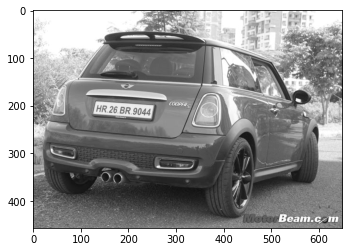

In [ ]:
img = cv2.imread('/content/drive/MyDrive/carimg1.jpg')
gray = cv2.imread('/content/drive/MyDrive/carimg1.jpg', 0)
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

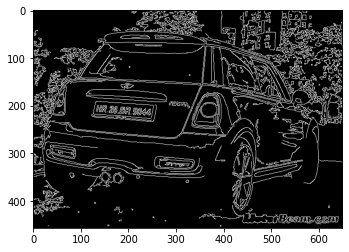

In [ ]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
#laplace = cv2.Laplacian(bfilter, cv2.CV_8U)
edged = cv2.Canny(bfilter, 30, 200)
plt.imshow(edged, cmap='gray')
plt.show()

In [ ]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [ ]:
location = None
for contour in contours:
  approx = cv2.approxPolyDP(contour, 10, True)
  if len(approx) == 4:
    location = approx
    break

In [ ]:
location

array([[[122, 219]],

       [[246, 227]],

       [[252, 200]],

       [[132, 191]]], dtype=int32)

In [ ]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

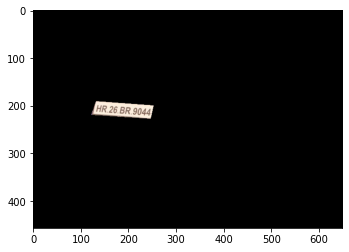

In [ ]:
plt.imshow(new_image)
plt.show()

In [ ]:
(x, y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

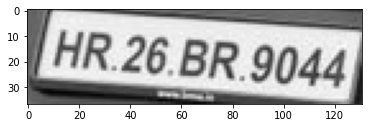

In [ ]:
plt.imshow(cropped_image, cmap = 'gray')
plt.show()

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[6, 4], [128, 4], [128, 34], [6, 34]], 'HR.26 BR.9044', 0.5717805048854637)]